# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [17]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [18]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [19]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [20]:
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [21]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify())  

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
  <link href="css/temp.css" rel="stylesheet" type="text/css"/>
 </head>
 <body>
  <main>
   <div class="container py-4">
    <header class="pb-3 mb-4 border-bottom">
     <a class="d-flex align-items-center text-dark text-decoration-none" href="/">
      <span class="fs-4">
       Mission To Mars
      </span>
     </a>
    </header>
    <div class="p-5 mb-4 bg-light rounded-3">
     <div class="container-fluid py-5">
      <h1 class="display-5 fw-bold">
       Mars Temperature Data
      </h1>
      <p class="col-md-8 fs-4">
       This is Mars data.
      </p>
      <table class="table">
       <tbody>
        <tr>
         <th>
          id
         </th>
         <th>
          terrestrial_date
     

In [22]:
table = soup.find('table')

In [23]:
print(table)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [24]:
 table_data = []

 # Step 6: Extract all rows from the table
rows = table.find_all('tr')  # Finds all table rows

        # Step 7: Loop through each row and extract the data
for row in rows:
    # Extract all columns (cells) in each row
    cols = row.find_all(['td'])  # Use 'td' for data cells and 'th' for header cells
    # Extract text from each cell
    col_data = [col.get_text(strip=True) for col in cols]
    # Append the extracted data to the list if it's not empty
    if col_data:
        table_data.append(col_data)

# Step 8: Print the extracted table data to confirm
for entry in table_data:
    print(entry)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [25]:
# # Create an empty list
# mars_data= []

# # Loop through the scraped data to create a list of rows
# for row in rows:
#     row_heading = row.find('th')
#     table_data= row.find_all('td')
#     row = [col.text for col in table_data]
#     mars_data.append(row)

In [26]:
# for entry in table_data:
#     print(entry)

In [27]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(table_data, columns = ["id","terrestrial_date","sol","ls","month","min_temp","pressure"])

In [28]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [29]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [30]:
# Change data types for data analysis
df.terrestrial_date = pd.to_datetime(df.terrestrial_date, dayfirst=True)
convert_dict = {'sol':'int64',
                'ls':'int64',
                'month':'int64',
                'min_temp':float,
                'pressure':float}
df = df.astype(convert_dict)

C:\Users\adolp\AppData\Local\Temp\ipykernel_33484\787586586.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df.terrestrial_date = pd.to_datetime(df.terrestrial_date, dayfirst=True)


In [31]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months are there on Mars?
month_count = df["month"].value_counts()
print(f"Number of months on Mars: {month_count}")

Number of months on Mars: month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: count, dtype: int64


In [33]:
# 1. How many months are there on Mars?
month_count = df["month"].value_counts()
print(month_count)

month
4     194
3     192
2     178
1     174
12    166
5     149
6     147
7     142
8     141
11    138
9     134
10    112
Name: count, dtype: int64


In [34]:
# 2. How many Martian days' worth of data are there?
martian_days= df["terrestrial_date"].count()
martian_days

1867

In [36]:
# 3. What is the average minimum temperature by month?
group_month = df.groupby("month")
group_month.head()
avg_temp = group_month["min_temp"].mean()
avg_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

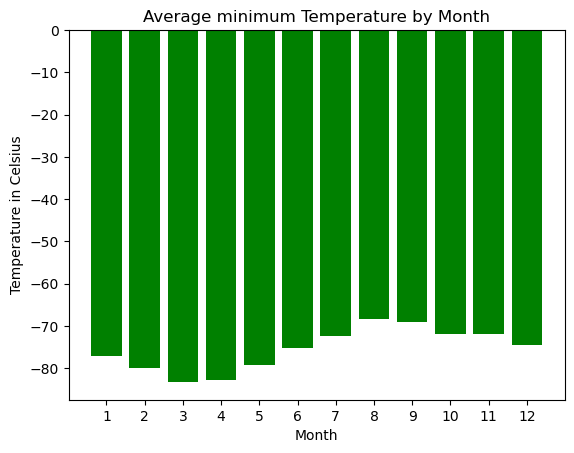

In [48]:
# Plot the average minimum temperature by month
plt.bar(avg_temp.index,avg_temp.values, color='green')
plt.title('Average minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
# Set tick locations and labels for all months
plt.xticks(avg_temp.index, [str(month) for month in avg_temp.index])


plt.show()

In [54]:
print(f" The coldest month in Curiosity's location is {avg_temp.idxmin()}")
print(f" The hottest month in Curiosity's location is {avg_temp.idxmax()}")

 The coldest month in Curiosity's location is 3
 The hottest month in Curiosity's location is 8


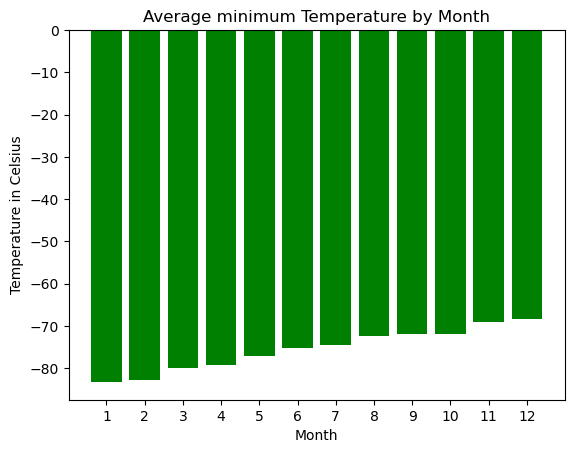

In [51]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_temp = avg_temp.sort_values()

plt.bar(avg_temp.index,sorted_avg_temp, color='green')
plt.title('Average minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
# Set tick locations and labels for all months
plt.xticks(avg_temp.index, [str(month) for month in avg_temp.index])


plt.show()

In [53]:
print(f" The coldest month in Curiosity's location is {avg_temp.idxmin()}")
print(f" The hottest month in Curiosity's location is {avg_temp.idxmax()}")

 The coldest month in Curiosity's location is 3
 The hottest month in Curiosity's location is 8


In [40]:
# 4. What is the average pressure by month?
group_month = df.groupby("month")
group_month.head()
avg_pressure = group_month["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

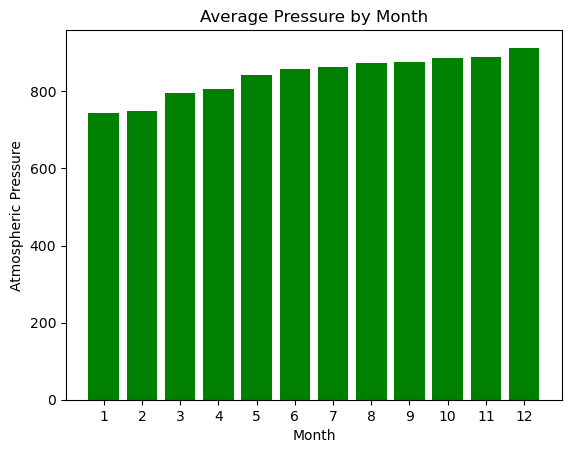

In [55]:
# Plot the average pressure by month
sorted_avg_pressure = avg_pressure.sort_values()

plt.bar(avg_pressure.index,sorted_avg_pressure, color='green')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Set tick locations and labels for all months
plt.xticks(avg_pressure.index, [str(month) for month in avg_pressure.index])


plt.show()

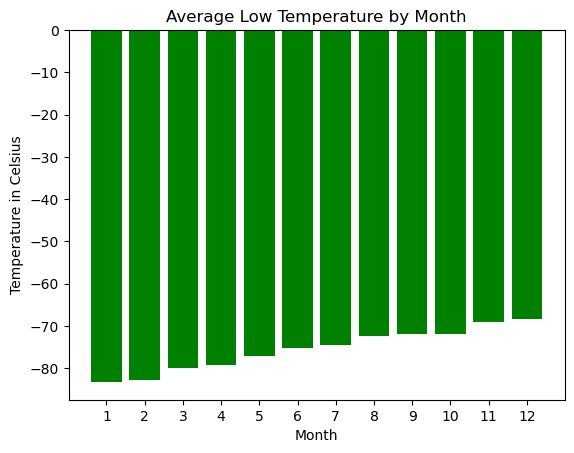

In [56]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_temp = avg_temp.sort_values()

plt.bar(avg_temp.index,sorted_avg_temp, color='green')
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
# Set tick locations and labels for all months
plt.xticks(avg_temp.index, [str(month) for month in avg_temp.index])


plt.show()

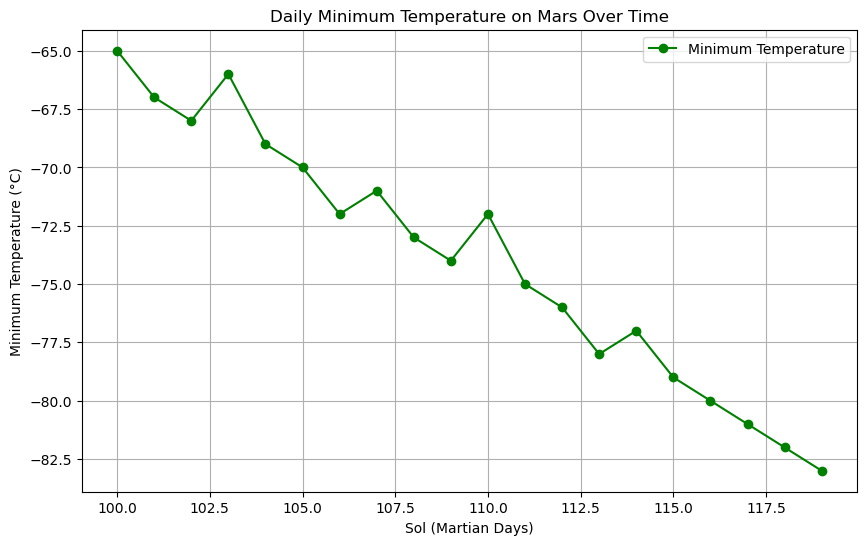

In [58]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.


# Example DataFrame with 'sol' and 'min_temp' columns representing Martian days and daily minimum temperatures
data = {
    'sol': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
    'min_temp': [-65, -67, -68, -66, -69, -70, -72, -71, -73, -74, -72, -75, -76, -78, -77, -79, -80, -81, -82, -83]
}
df = pd.DataFrame(data)

# Plot daily minimum temperatures over time
plt.figure(figsize=(10, 6))
plt.plot(df['sol'], df['min_temp'], marker='o', linestyle='-', color='g', label='Minimum Temperature')
plt.title('Daily Minimum Temperature on Mars Over Time')
plt.xlabel('Sol (Martian Days)')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

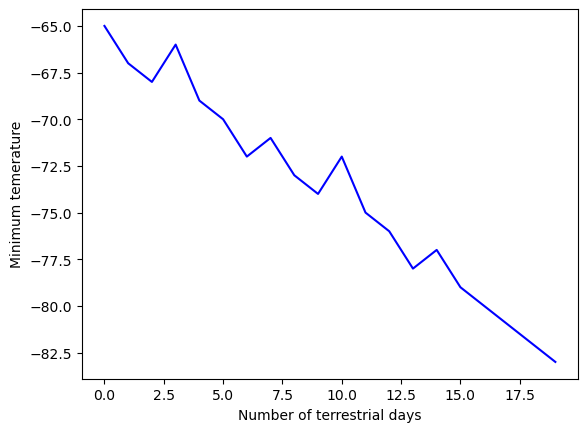

In [57]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(df.index,df.min_temp, color='blue')

plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temerature')

plt.show()

#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [47]:
# Write the data to a CSV
df.to_csv("Output/Mars_tempdata.csv",index=False)

In [22]:
browser.quit()